In [67]:
import numpy as np 
import matplotlib.pyplot as plt

#### Creating Dataset
A simple dataset using numpy arrays

In [68]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

In [69]:
x_train.shape, y_train.shape

((15, 1), (15, 1))

#### View the data
There seems to be some relationship which can be plotted between x_train and y_train. A regression line can be drawn to represent the relationship

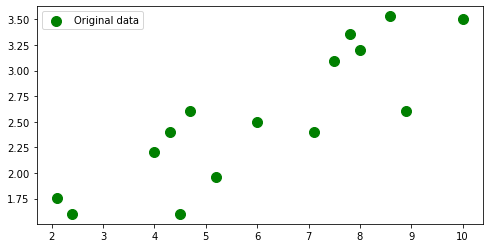

In [70]:
plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, label='Original data', s=100, c='g')
plt.legend()
plt.show()

In [71]:
import torch 

#### Converting data to pytorch tensors
By defualt requires_grad = False

In [72]:
X_train = torch.from_numpy(x_train) 
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


#### Set the details for our neural network
Input, output and hidden layer sizes plus the learning rate

In [73]:
input_size = 1 
hidden_size = 1
output_size = 1

#### Create random Tensors for weights.<br>
Setting requires_grad=True indicates that we want to compute gradients with respect to these Tensors during the backward pass

In [74]:
w1 = torch.rand(input_size, 
                hidden_size, 
                requires_grad=True)
w1.shape

torch.Size([1, 1])

In [76]:
print(w1.grad_fn)

None


In [84]:
print(w1)

tensor([[0.0149]], requires_grad=True)


In [85]:
w2 = torch.rand(hidden_size, 
                output_size, 
                requires_grad=True)
w2.shape

torch.Size([1, 1])

In [86]:
print(w2.grad_fn)

None


## Training

#### Foward Pass:
* Predicting Y with input data X
* finding (matrix X matrix) using .mm function, finding product of X_train and w1 and activation function is identity function
* again doing mat product data with second weight w2

#### Finding Loss:
* Finding difference between Y_train and Y_pred by squaring the difference and then summing out, similar to nn.MSELoss 


#### For the loss_backward() function call:
* backward pass will compute the gradient of loss with respect to all Tensors with requires_grad=True. 
* After this call w1.grad and w2.grad will be Tensors holding the gradient of the loss with respect to w1 and w2 respectively.

#### Manually updating the weights
* weights have requires_grad=True, but we don't need to track this in autograd. So will wrap it in torch.no_grad
* reducing weight with multiple of learning rate and gradient
* manually zero the weight gradients after updating weights

In [25]:
learning_rate = 1e-6
print(format(learning_rate, 'f'))

0.000001


In [112]:
learning_rate = 0.000001
print(learning_rate)

1e-06


In [88]:
y_train

array([[2.6  ],
       [1.6  ],
       [3.09 ],
       [2.4  ],
       [2.4  ],
       [3.357],
       [2.6  ],
       [1.96 ],
       [3.53 ],
       [1.76 ],
       [3.2  ],
       [3.5  ],
       [1.6  ],
       [2.5  ],
       [2.2  ]], dtype=float32)

In [89]:
# Start at 10. Change this to 100, 1000 and 3000 and run the code all the way to the plot at the bottom
for iter in range(1, 10):
    
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

In [113]:
for i in range(1, 100):
    y_pred = X_train.mm(w1).mm(w2)
    
    loss = (y_pred - Y_train).pow(2).sum()
    print(loss.item())
    
    loss.backward()
    print(w1.grad)
    print(w2.grad)
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098633
tensor([[-0.0003]])
tensor([[-0.0002]])
4.089357376098

In [91]:
y_pred

tensor([[1.0904],
        [0.5568],
        [1.7400],
        [1.6472],
        [0.9976],
        [1.8133],
        [2.0648],
        [1.2064],
        [1.9929],
        [0.4872],
        [1.8560],
        [2.3200],
        [1.0440],
        [1.3920],
        [0.9280]], grad_fn=<MmBackward>)

In [114]:
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.5287]], requires_grad=True)
w2:  tensor([[0.7503]], requires_grad=True)


In [95]:
type(x_train)

numpy.ndarray

#### Checking the output

Converting data into a tensor

In [115]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

#### Get the predicted values using the weights 
Using final weights calculated from our training in order to get the predicted values

In [116]:
pred_tensor = X_train.mm(w1).mm(w2)
pred_tensor

tensor([[1.8642],
        [0.9519],
        [2.9748],
        [2.8162],
        [1.7056],
        [3.1002],
        [3.5301],
        [2.0625],
        [3.4072],
        [0.8329],
        [3.1731],
        [3.9664],
        [1.7849],
        [2.3799],
        [1.5866]], grad_fn=<MmBackward>)

In [109]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

NameError: name 'x_train_tensor' is not defined

#### Convert the prediction to a numpy array
This will be used to plot the regression line in a plot

In [117]:
pred_np = pred_tensor.detach().numpy()
type(pred_np)
pred_np

array([[1.8642192],
       [0.9519418],
       [2.974818 ],
       [2.816161 ],
       [1.7055625],
       [3.100157 ],
       [3.5301173],
       [2.0625405],
       [3.4071584],
       [0.832949 ],
       [3.1731393],
       [3.9664242],
       [1.7848909],
       [2.3798544],
       [1.5865697]], dtype=float32)

In [82]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[0.58360565],
       [0.29801142],
       [0.9312856 ],
       [0.88161707],
       [0.5339371 ],
       [0.97052383],
       [1.1051255 ],
       [0.64569134],
       [1.0666325 ],
       [0.26075998],
       [0.99337137],
       [1.2417141 ],
       [0.5587714 ],
       [0.74502856],
       [0.49668568]], dtype=float32)

#### Plotting
Our training has produced a rather accurate regression line

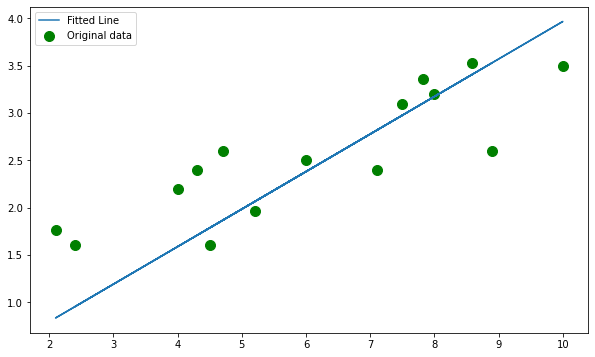

In [119]:
plt.figure(figsize=(10, 6))

plt.scatter(x_train, y_train, label = 'Original data', s=100, c='g') 
plt.plot(x_train,pred_np, label = 'Fitted Line' )
# plt.plot(x_train, predicted, label = 'Fitted line ')

plt.legend() 

plt.show()